In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset
admission = pd.read_csv('admission.csv')

# Displaying the rows and dataset info to understand its structure
admission.head(), admission.info()
admission.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# data2 = admission.groupby(['Serial No.'])[['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research', 'Chance of Admit ']].mean().reset_index()


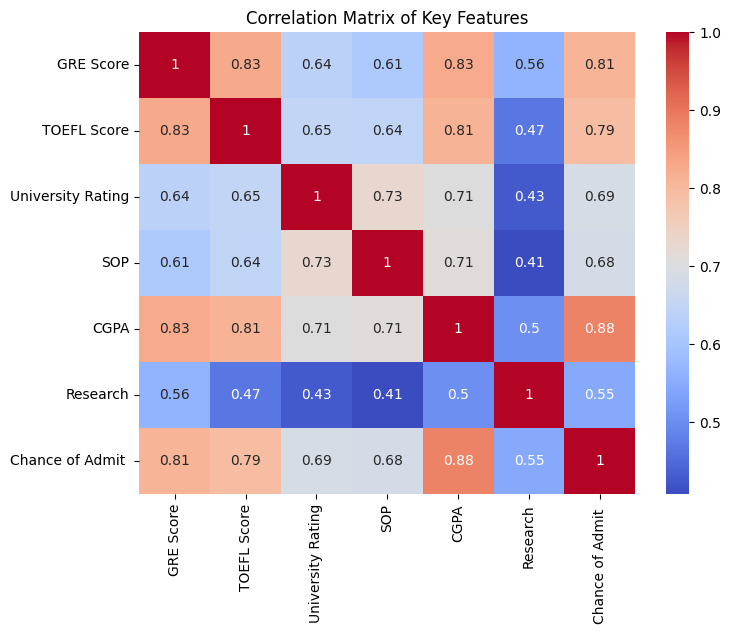

In [6]:
# Selecting relevant features
Features = ['GRE Score','TOEFL Score','University Rating', 'SOP','CGPA','Research', 'Chance of Admit ']
Admissiondata = admission[Features]

# Calculating the correlation matrix
graph =Admissiondata.corr()

# Ploting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(graph, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()

In [7]:
# Renaming columns for easier reference
admission.rename(columns={'Chance of Admit ': 'Admit'}, inplace=True)

# Converting the target column to binary (Admit > 0.5 as admitted, else not admitted)
admission['Admit'] = (admission['Admit'] > 0.5).astype(int)

In [8]:
# Separate features (X) and target (y)
X = admission.drop('Admit', axis=1)
y = admission['Admit']

In [9]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)


In [10]:
# Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.92
Confusion Matrix:
 [[ 3  8]
 [ 0 89]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.92      1.00      0.96        89

    accuracy                           0.92       100
   macro avg       0.96      0.64      0.69       100
weighted avg       0.93      0.92      0.90       100



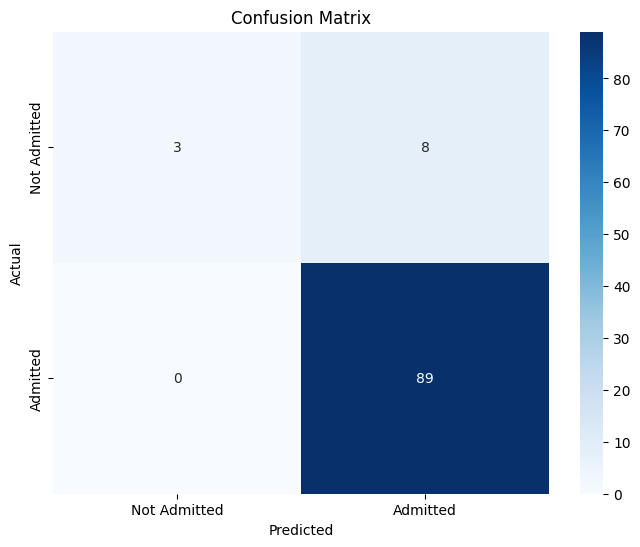

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Interpret Model Coefficients
coefficients = model.coef_[0]
feature_impact = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_impact = feature_impact.sort_values(by='Coefficient', ascending=False)
print("\nFeature Impact on Admission:\n", feature_impact)



Feature Impact on Admission:
              Feature  Coefficient
6               CGPA     1.591197
5               LOR      0.837911
0         Serial No.     0.737286
2        TOEFL Score     0.715511
1          GRE Score     0.526794
7           Research    -0.011471
4                SOP    -0.113222
3  University Rating    -0.420704


CGPA often has the highest coefficients in admission models, indicating its critical impact on decisions.

SOP Rating
A low magnitude would imply this factor is less influential compared to others.

Rese

University Ratings
A low magnitude would imply this factor is less influential compared to others.

LOR Strength

A positive coefficient indicates that strong LORs are helpful for admissions.


TOEFL Score

A positive coefficient suggests that higher TOEFL scores are positively associated with admission chances.


GRE Score

A positive coefficient indicates that a higher GRE score increases the likelihood of admission.
The magnitude of the coefficient shows the relative importance of GRE in comparison to other features.